# ICSS Data analysis script

### METADATA:


### OUTLINE:

Prerequisite: CSV files of ICSS data files generated using the script written by Steve Cabilio
1. Preprocessing data
    1. Cleaning
    2. Annotating
    3. Overview
2. Normalizing data
    1.
    2.
    3. 
3. Plotting data
    1. Raw values
        1. Pass 1-4
        2. Pass 2-4
    2. Normalized values (Pass 2-4)
    3. Normalized values (Mean of Passes 2-4)
4. Saving data in 'Prism' friendly format
---

In [1]:
%%capture
%%bash
# 0. Preprocessing ANA files that are generated by Steve Cabilio's program
# this line makes the script machine agnostic by assigning the username automatically
userName=$(echo $USER)

# We move to the folder where the cohort data is stored
# cd </path/to/cohort/data>
cd /Users/$userName/Dropbox\ \(Partners\ HealthCare\)/Projects/R01_2017_OxycSA-NASh-Glutamate/_data_R01_2017/_data_R01_2017_ICSS/_ana_files/Cohort01

# entering each subject/animal directory to list all the CSV files and to run the program on each
for dirName in $(ls -d */)
do
    cd $dirName
    for fileName in $(ls ANA*.CSV)
    do
        preprocessICSSFiles --file $fileName;
    done
    cd ..
done

In [2]:
%load_ext rpy2.ipython

In [3]:
%%capture
%%R
# loading required libraries for R
library(tidyverse)
library(lubridate)
library(viridis)

In [4]:
%%capture
%%R
# 1. loading data: set the path to 
dataDir <- "~/Dropbox (Partners HealthCare)/Projects/R01_2017_OxycSA-NASh-Glutamate/_data_R01_2017/_data_R01_2017_ICSS/_ana_files/Cohort01/"
fileList <- list.files(path = dataDir, pattern = "preprocessed.csv", recursive = T)
## generating combined data table
data <- fileList %>% map(~ read_csv(file.path(dataDir, .))) %>% reduce(rbind)

In [5]:
%%R
data %>% print

# A tibble: 1,096 x 7
   Date       Subject Experiment  Pass T0    M50   MaxRate
   <date>     <chr>   <chr>      <dbl> <chr> <chr>   <dbl>
 1 2019-01-17 SG13    RF             1 37.61 72.22     275
 2 2019-01-17 SG13    RF             2 50.42 78.28     177
 3 2019-01-17 SG13    RF             3 49.5  58.25     241
 4 2019-01-17 SG13    RF             4 63    74.78     212
 5 2019-01-18 SG13    RF             1 33.77 55.55     201
 6 2019-01-18 SG13    RF             2 59.77 69.08     165
 7 2019-01-18 SG13    RF             3 62.66 77.56     168
 8 2019-01-18 SG13    RF             4 57.85 81.47     158
 9 2019-01-22 SG13    RF             1 38.03 46.48     282
10 2019-01-22 SG13    RF             2 33.38 52.09     340
# ... with 1,086 more rows


In [6]:
%%R
# 2. Prepping data
# 2.1. Cleaning data
# re-assigning data types to individual columns. This gets broken when there are missing values
# Ideal data types
# Date   | Subject  | Experiment |   Pass   |  T0   |  M50  | MaxRate
# <date> | <factor> |  <factor>  | <factor> | <num> | <num> |  <num>

data$Subject <- data$Subject %>% as.factor
data$Experiment <- data$Experiment %>% as.factor
data$Pass <- data$Pass %>% as.factor
data$T0 <- data$T0 %>% as.numeric
data$M50 <- data$M50 %>% as.numeric
data %>% print

# A tibble: 1,096 x 7
   Date       Subject Experiment Pass     T0   M50 MaxRate
   <date>     <fct>   <fct>      <fct> <dbl> <dbl>   <dbl>
 1 2019-01-17 SG13    RF         1      37.6  72.2     275
 2 2019-01-17 SG13    RF         2      50.4  78.3     177
 3 2019-01-17 SG13    RF         3      49.5  58.2     241
 4 2019-01-17 SG13    RF         4      63    74.8     212
 5 2019-01-18 SG13    RF         1      33.8  55.6     201
 6 2019-01-18 SG13    RF         2      59.8  69.1     165
 7 2019-01-18 SG13    RF         3      62.7  77.6     168
 8 2019-01-18 SG13    RF         4      57.8  81.5     158
 9 2019-01-22 SG13    RF         1      38.0  46.5     282
10 2019-01-22 SG13    RF         2      33.4  52.1     340
# ... with 1,086 more rows


In [7]:
%%R
# 2. Prepping data
# 2.2. Overview 
# Dates over which the experiment has run
data$Date %>% str()
data$Date %>% unique()

 Date[1:1096], format: "2019-01-17" "2019-01-17" "2019-01-17" "2019-01-17" "2019-01-18" ...
 [1] "2019-01-17" "2019-01-18" "2019-01-22" "2019-01-23" "2019-01-24"
 [6] "2019-01-25" "2019-01-28" "2019-01-29" "2019-01-30" "2019-02-01"
[11] "2019-02-04" "2019-02-06" "2019-02-07" "2019-02-08" "2019-02-18"
[16] "2019-02-19" "2019-02-20" "2019-02-21" "2019-02-22" "2019-02-25"
[21] "2019-02-26" "2019-02-27" "2019-02-28" "2019-03-01" "2019-03-04"
[26] "2019-03-05" "2019-03-06" "2019-03-07" "2019-03-08" "2019-03-11"
[31] "2019-03-12" "2019-03-13" "2019-03-14" "2019-03-15" "2019-03-18"
[36] "2019-03-19" "2019-03-20" "2019-03-21" "2019-03-22" "2019-03-25"
[41] "2019-03-26" "2019-03-27" "2019-03-28" "2019-03-29" "2019-04-01"
[46] "2019-04-02" "2019-01-31"


In [8]:
%%R
# 2.2. Checking out data
# Subjects in the experiment over which the experiment has run
data$Subject %>% str()
data$Subject %>% unique()

 Factor w/ 7 levels "SG13","SG14",..: 1 1 1 1 1 1 1 1 1 1 ...
[1] SG13 SG14 SG15 SG17 SG19 SG20 SG24
Levels: SG13 SG14 SG15 SG17 SG19 SG20 SG24


In [9]:
%%R
# 2.1. Cleaning data
# SG19 is being discarded from the data as the rat did not move to the self-administration stage
# SG13 presumably had some infections
data <- data %>% filter(Subject != "SG19" & Subject != "SG13")

In [180]:
%%R
# 3. Normalizing data
# Normalizing data to 2 days pre- and post-surgery
# Normalizing dates 
# Pre-surgery: 2019-02-07, 2019-02-08
# Post-surgery: 2019-02-18, 2019-02-19
# Normalizing Pass: Pass > 1 & Pass <= 4
dataSG14 <- data %>% filter(Subject == "SG14" & Pass != "1") %>% na.omit()
dataSG15 <- data %>% filter(Subject == "SG15" & Pass != "1") %>% na.omit()
dataSG17 <- data %>% filter(Subject == "SG17" & Pass != "1") %>% na.omit()
dataSG20 <- data %>% filter(Subject == "SG20" & Pass != "1") %>% na.omit()
dataSG24 <- data %>% filter(Subject == "SG24" & Pass != "1") %>% na.omit()

In [181]:
%%R
# Subsetting Pre-surgery and Post-surgery days to calculate mean
meansSG14 <- data %>% filter(Subject == "SG14" & Pass != "1") %>% na.omit()
meansSG15 <- data %>% filter(Subject == "SG15" & Pass != "1") %>% na.omit()
meansSG17 <- data %>% filter(Subject == "SG17" & Pass != "1") %>% na.omit()
meansSG20 <- data %>% filter(Subject == "SG20" & Pass != "1") %>% na.omit()
meansSG24 <- data %>% filter(Subject == "SG24" & Pass != "1") %>% na.omit()

In [182]:
%%R
# Removing 'Pass' variable and calculating mean
meanSG14 <- data %>% filter(Subject == "SG14" & Pass != "1" & Date >= "2019-02-07" & Date <= "2019-02-19") %>% na.omit() %>% select(-Date, -Pass, -Experiment) %>% group_by(Subject) %>% summarise_all(mean)
meanSG15 <- data %>% filter(Subject == "SG15" & Pass != "1" & Date >= "2019-02-07" & Date <= "2019-02-19") %>% na.omit() %>% select(-Date, -Pass, -Experiment) %>% group_by(Subject) %>% summarise_all(mean)
meanSG17 <- data %>% filter(Subject == "SG17" & Pass != "1" & Date >= "2019-02-07" & Date <= "2019-02-19") %>% na.omit() %>% select(-Date, -Pass, -Experiment) %>% group_by(Subject) %>% summarise_all(mean)
meanSG20 <- data %>% filter(Subject == "SG20" & Pass != "1" & Date >= "2019-02-07" & Date <= "2019-02-19") %>% na.omit() %>% select(-Date, -Pass, -Experiment) %>% group_by(Subject) %>% summarise_all(mean)
meanSG24 <- data %>% filter(Subject == "SG24" & Pass != "1" & Date >= "2019-02-07" & Date <= "2019-02-19") %>% na.omit() %>% select(-Date, -Pass, -Experiment) %>% group_by(Subject) %>% summarise_all(mean)

In [183]:
%%R
# normalizing T0 data to means
meansSG14 <- meansSG14 %>% mutate(norm.T0 = (T0 / meanSG14$T0 * 100))
meansSG15 <- meansSG15 %>% mutate(norm.T0 = (T0 / meanSG15$T0 * 100))
meansSG17 <- meansSG17 %>% mutate(norm.T0 = (T0 / meanSG17$T0 * 100))
meansSG20 <- meansSG20 %>% mutate(norm.T0 = (T0 / meanSG20$T0 * 100))
meansSG24 <- meansSG24 %>% mutate(norm.T0 = (T0 / meanSG24$T0 * 100))

In [184]:
%%R
# normalizing M50 data to means
meansSG14 <- meansSG14 %>% mutate(norm.M50 = (M50 / meanSG14$M50 * 100))
meansSG15 <- meansSG15 %>% mutate(norm.M50 = (M50 / meanSG15$M50 * 100))
meansSG17 <- meansSG17 %>% mutate(norm.M50 = (M50 / meanSG17$M50 * 100))
meansSG20 <- meansSG20 %>% mutate(norm.M50 = (M50 / meanSG20$M50 * 100))
meansSG24 <- meansSG24 %>% mutate(norm.M50 = (M50 / meanSG24$M50 * 100))

In [185]:
%%R 
# normalizing MaxRate data to means
meansSG14 <- meansSG14 %>% mutate(norm.MaxRate = (MaxRate / meanSG14$MaxRate * 100))
meansSG15 <- meansSG15 %>% mutate(norm.MaxRate = (MaxRate / meanSG15$MaxRate * 100))
meansSG17 <- meansSG17 %>% mutate(norm.MaxRate = (MaxRate / meanSG17$MaxRate * 100))
meansSG20 <- meansSG20 %>% mutate(norm.MaxRate = (MaxRate / meanSG20$MaxRate * 100))
meansSG24 <- meansSG24 %>% mutate(norm.MaxRate = (MaxRate / meanSG24$MaxRate * 100))

In [186]:
%%R
normSG14 <- meansSG14 %>% select(-T0, -M50, -MaxRate)
normSG15 <- meansSG15 %>% select(-T0, -M50, -MaxRate)
normSG17 <- meansSG17 %>% select(-T0, -M50, -MaxRate)
normSG20 <- meansSG20 %>% select(-T0, -M50, -MaxRate)
normSG24 <- meansSG24 %>% select(-T0, -M50, -MaxRate)

In [187]:
%%R
# printing out raw values
dataSG14 %>% print()
dataSG15 %>% print()
dataSG17 %>% print()
dataSG20 %>% print()
dataSG24 %>% print()

# A tibble: 121 x 7
   Date       Subject Experiment Pass     T0   M50 MaxRate
   <date>     <fct>   <fct>      <fct> <dbl> <dbl>   <int>
 1 2019-01-28 SG14    RF         2      28.7  64.5     180
 2 2019-01-28 SG14    RF         3      47.8  59.2     181
 3 2019-01-28 SG14    RF         4      40.2  73.6     171
 4 2019-01-29 SG14    RF         2      48.6  68.3     189
 5 2019-01-29 SG14    RF         3      47.0  56.3     162
 6 2019-01-29 SG14    RF         4      46.5  62.0     157
 7 2019-01-30 SG14    RF         2      49.5  67.8     182
 8 2019-01-30 SG14    RF         3      43.4  57.6     153
 9 2019-01-30 SG14    RF         4      50.4  64.4     152
10 2019-01-31 SG14    RF         2      40.4  66.9     171
# ... with 111 more rows
# A tibble: 139 x 7
   Date       Subject Experiment Pass     T0   M50 MaxRate
   <date>     <fct>   <fct>      <fct> <dbl> <dbl>   <int>
 1 2019-01-17 SG15    RF         2      66.5 109.      148
 2 2019-01-17 SG15    RF         3      48.2 101. 

In [188]:
%%R
# printing out mean values
meanSG14 %>% print()
meanSG15 %>% print()
meanSG17 %>% print()
meanSG20 %>% print()
meanSG24 %>% print()

# A tibble: 1 x 4
  Subject    T0   M50 MaxRate
  <fct>   <dbl> <dbl>   <dbl>
1 SG14     47.6  66.1    166.
# A tibble: 1 x 4
  Subject    T0   M50 MaxRate
  <fct>   <dbl> <dbl>   <dbl>
1 SG15     49.2  89.1    154.
# A tibble: 1 x 4
  Subject    T0   M50 MaxRate
  <fct>   <dbl> <dbl>   <dbl>
1 SG17     62.3  87.1    165.
# A tibble: 1 x 4
  Subject    T0   M50 MaxRate
  <fct>   <dbl> <dbl>   <dbl>
1 SG20     51.1  65.7    189.
# A tibble: 1 x 4
  Subject    T0   M50 MaxRate
  <fct>   <dbl> <dbl>   <dbl>
1 SG24     50.6  72.5    115.


In [189]:
%%R 
# printing out means data
meansSG14 <- meansSG14 %>% rename(mean.T0 = T0, mean.M50 = M50, mean.MaxRate = MaxRate) %>% select(-norm.T0, -norm.M50, -norm.MaxRate) %>% print()
meansSG15 <- meansSG15 %>% rename(mean.T0 = T0, mean.M50 = M50, mean.MaxRate = MaxRate) %>% select(-norm.T0, -norm.M50, -norm.MaxRate) %>% print()
meansSG17 <- meansSG17 %>% rename(mean.T0 = T0, mean.M50 = M50, mean.MaxRate = MaxRate) %>% select(-norm.T0, -norm.M50, -norm.MaxRate) %>% print()
meansSG20 <- meansSG20 %>% rename(mean.T0 = T0, mean.M50 = M50, mean.MaxRate = MaxRate) %>% select(-norm.T0, -norm.M50, -norm.MaxRate) %>% print()
meansSG24 <- meansSG24 %>% rename(mean.T0 = T0, mean.M50 = M50, mean.MaxRate = MaxRate) %>% select(-norm.T0, -norm.M50, -norm.MaxRate) %>% print()

# A tibble: 121 x 7
   Date       Subject Experiment Pass  mean.T0 mean.M50 mean.MaxRate
   <date>     <fct>   <fct>      <fct>   <dbl>    <dbl>        <int>
 1 2019-01-28 SG14    RF         2        28.7     64.5          180
 2 2019-01-28 SG14    RF         3        47.8     59.2          181
 3 2019-01-28 SG14    RF         4        40.2     73.6          171
 4 2019-01-29 SG14    RF         2        48.6     68.3          189
 5 2019-01-29 SG14    RF         3        47.0     56.3          162
 6 2019-01-29 SG14    RF         4        46.5     62.0          157
 7 2019-01-30 SG14    RF         2        49.5     67.8          182
 8 2019-01-30 SG14    RF         3        43.4     57.6          153
 9 2019-01-30 SG14    RF         4        50.4     64.4          152
10 2019-01-31 SG14    RF         2        40.4     66.9          171
# ... with 111 more rows
# A tibble: 139 x 7
   Date       Subject Experiment Pass  mean.T0 mean.M50 mean.MaxRate
   <date>     <fct>   <fct>      <fct>

In [192]:
%%R
# printing out normalized data
normSG14 <- normSG14 %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>% ungroup() %>% print() 
normSG15 <- normSG15 %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>% ungroup() %>% print() 
normSG17 <- normSG17 %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>% ungroup() %>% print() 
normSG20 <- normSG20 %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>% ungroup() %>% print() 
normSG24 <- normSG24 %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>% ungroup() %>% print() 

# A tibble: 121 x 7
   Date       Subject Experiment Pass  norm.T0 norm.M50 norm.MaxRate
   <date>     <fct>   <fct>      <fct>   <dbl>    <dbl>        <dbl>
 1 2019-01-28 SG14    RF         2        60.3     97.6        109. 
 2 2019-01-28 SG14    RF         3       100.      89.6        109. 
 3 2019-01-28 SG14    RF         4        84.5    111.         103. 
 4 2019-01-29 SG14    RF         2       102.     103.         114. 
 5 2019-01-29 SG14    RF         3        98.7     85.2         97.8
 6 2019-01-29 SG14    RF         4        97.7     93.9         94.8
 7 2019-01-30 SG14    RF         2       104.     103.         110. 
 8 2019-01-30 SG14    RF         3        91.2     87.2         92.4
 9 2019-01-30 SG14    RF         4       106.      97.4         91.8
10 2019-01-31 SG14    RF         2        84.9    101.         103. 
# ... with 111 more rows
# A tibble: 139 x 7
   Date       Subject Experiment Pass  norm.T0 norm.M50 norm.MaxRate
   <date>     <fct>   <fct>      <fct>

In [193]:
%%R
# combine all the Subject data into one single data frame and plot
normData <- bind_rows(normSG14, normSG15, normSG17, normSG20, normSG24) %>% arrange(Date) %>% print

# A tibble: 645 x 7
   Date       Subject Experiment Pass  norm.T0 norm.M50 norm.MaxRate
   <date>     <fct>   <fct>      <fct>   <dbl>    <dbl>        <dbl>
 1 2019-01-17 SG15    RF         2       135.     122.          96.2
 2 2019-01-17 SG15    RF         3        97.9    113.          87.1
 3 2019-01-17 SG15    RF         4       143.      99.3         53.9
 4 2019-01-17 SG24    RF         2        28.5     52.6        125. 
 5 2019-01-17 SG24    RF         3        45.5     42.9        100. 
 6 2019-01-17 SG24    RF         4        23.5     84.0        105. 
 7 2019-01-18 SG15    RF         2       154.     101.          77.3
 8 2019-01-18 SG15    RF         3       147.     105.          77.3
 9 2019-01-18 SG15    RF         4       149.      96.9         27.3
10 2019-01-18 SG24    RF         2        25.8     36.0        138. 
# ... with 635 more rows


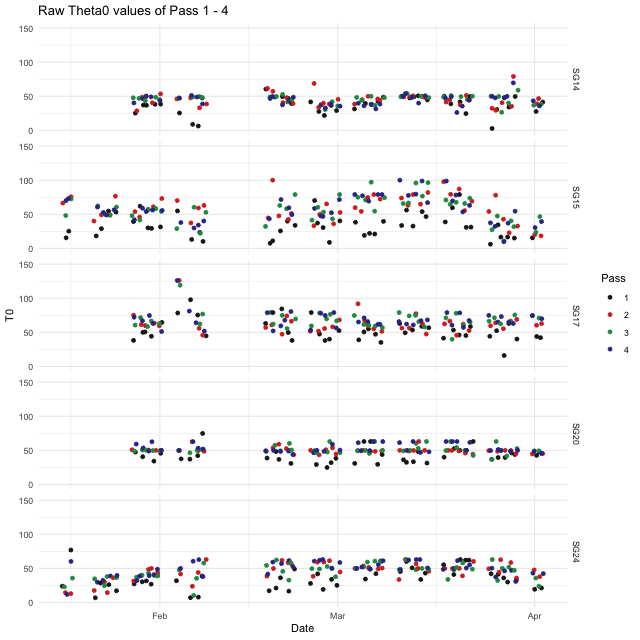

In [10]:
%%R -w 640 -h 640
# 3. Plotting raw values for T0, Pass 1 - 4
lower_limit = 0
upper_limit = 150
data %>% ggplot(aes(x = Date, y = T0)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw Theta0 values of Pass 1 - 4") + theme_minimal()

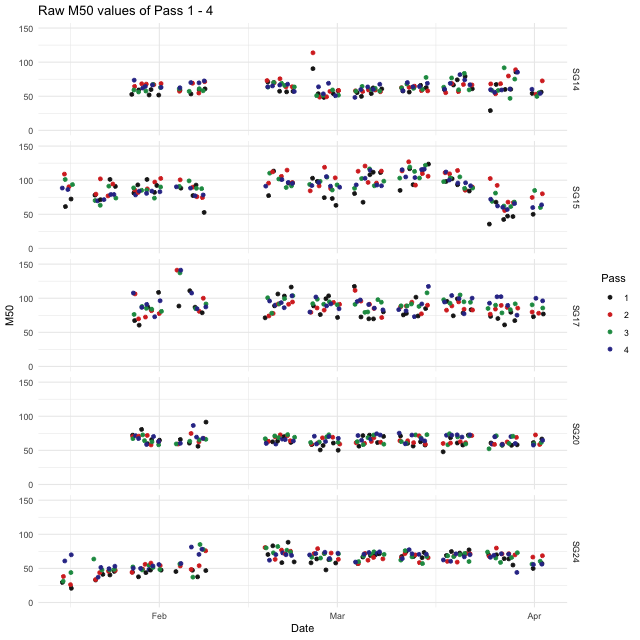

In [11]:
%%R -w 640 -h 640
# 3. Plotting raw values for M50, Pass 1 - 4
lower_limit = 0
upper_limit = 150
data %>% ggplot(aes(x = Date, y = M50)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw M50 values of Pass 1 - 4") + theme_minimal()

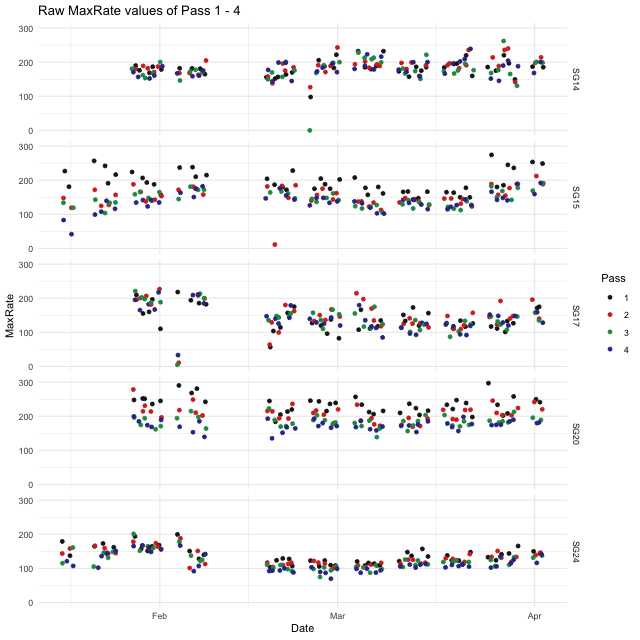

In [12]:
%%R -w 640 -h 640
# 3. Plotting raw values for MaxRate, Pass 1 - 4
lower_limit = 0
upper_limit = 300
data %>% ggplot(aes(x = Date, y = MaxRate)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw MaxRate values of Pass 1 - 4") + theme_minimal()

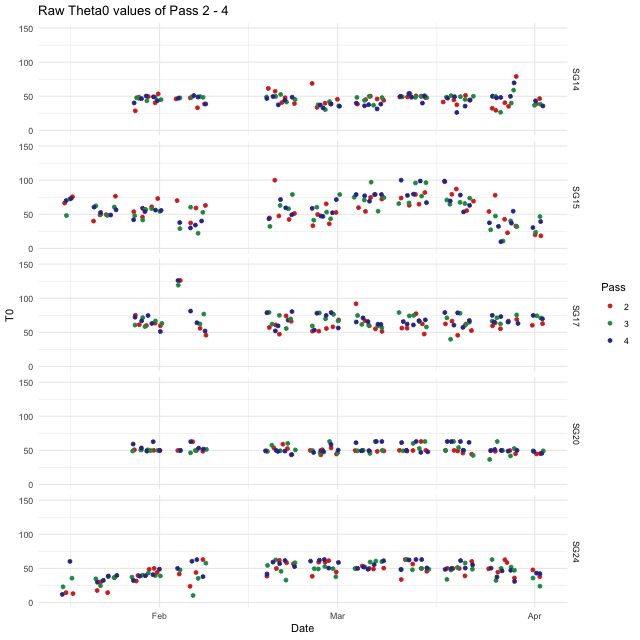

In [13]:
%%R -w 640 -h 640
# 3. Plotting raw values for T0, Pass 2 - 4
lower_limit = 0
upper_limit = 150
data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = T0)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw Theta0 values of Pass 2 - 4") + theme_minimal()

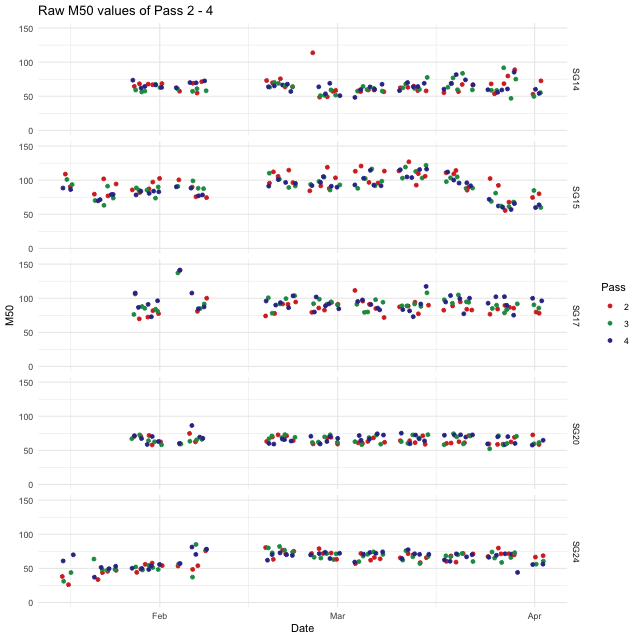

In [14]:
%%R -w 640 -h 640
# 3. Plotting raw values for M50, Pass 2 - 4
lower_limit = 0
upper_limit = 150
data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = M50)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw M50 values of Pass 2 - 4") + theme_minimal()

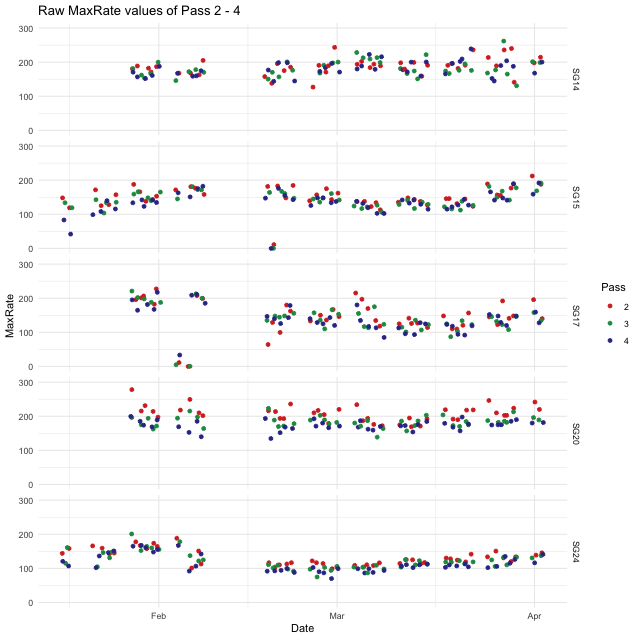

In [15]:
%%R -w 640 -h 640
# 3. Plotting raw values for MaxRate, Pass 2 - 4
lower_limit = 0
upper_limit = 300
data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = MaxRate)) + 
geom_jitter(aes(color = Pass)) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw MaxRate values of Pass 2 - 4") + theme_minimal()

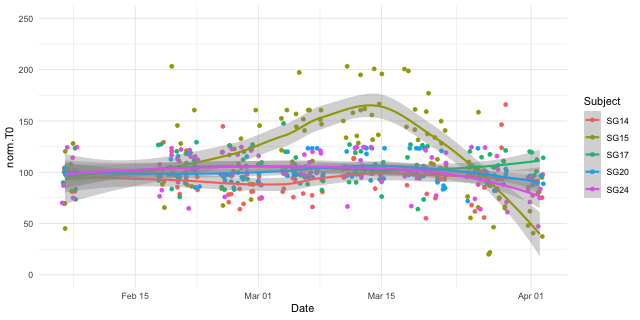

In [202]:
%%R -w 640 -h 320
# plotting all passes
normData %>% filter(Date >= "2019-02-07") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.T0, color = Subject)) + 
geom_jitter() + geom_smooth(method = 'loess') + 
ylim(0, 250) + 
theme_minimal()

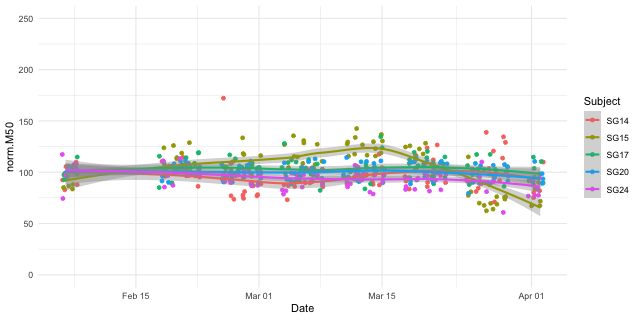

In [206]:
%%R -w 640 -h 320
# plotting all the passes
normData %>% filter(Date >= "2019-02-07") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.M50, color = Subject)) + 
geom_jitter() + geom_smooth(method = 'loess') + 
ylim(0, 250) + 
theme_minimal()

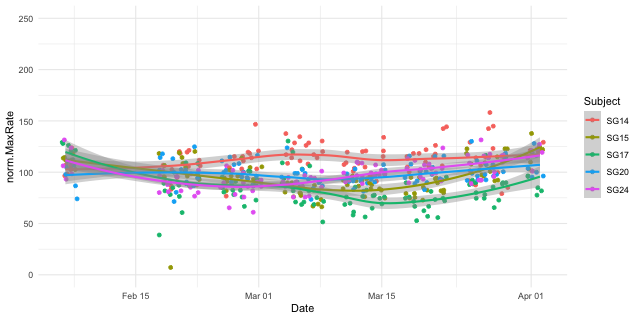

In [207]:
%%R -w 640 -h 320
# plotting the means of all the passes
normData %>% filter(Date >= "2019-02-07") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.MaxRate, color = Subject)) + 
geom_jitter() + geom_smooth(method = 'loess') + 
ylim(0, 250) + 
theme_minimal()

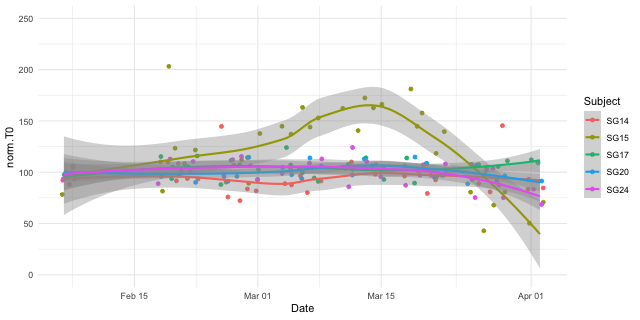

In [208]:
%%R -w 640 -h 320
# plotting the means of all the passes
normData %>% filter(Date >= "2019-02-07") %>% select(-Pass, -Experiment) %>% group_by(Date, Subject) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.T0, color = Subject)) + 
geom_jitter() + geom_smooth(method = 'loess') + 
ylim(0, 250) + 
theme_minimal()

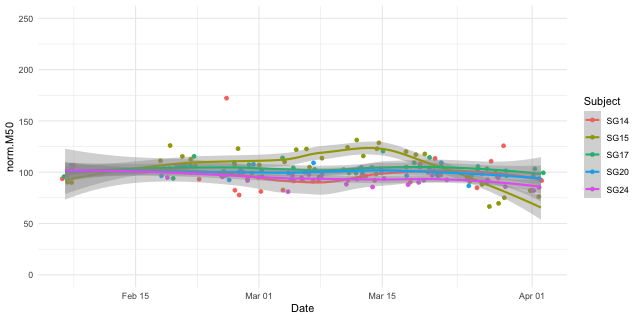

In [209]:
%%R -w 640 -h 320
# plotting the means of all the passes
normData %>% filter(Date >= "2019-02-07") %>% select(-Pass, -Experiment) %>% group_by(Date, Subject) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.M50, color = Subject)) + 
geom_jitter() + geom_smooth(method = 'loess') + 
ylim(0, 250) + 
theme_minimal()

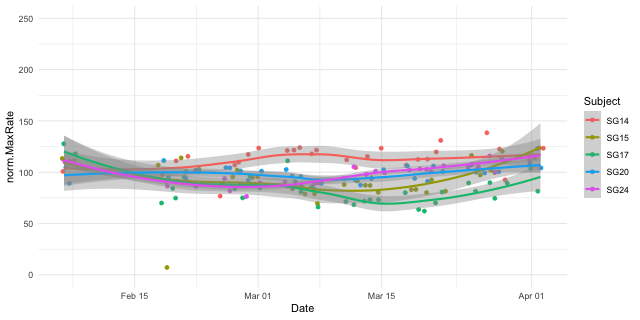

In [210]:
%%R -w 640 -h 320
# plotting the means of all the passes
normData %>% filter(Date >= "2019-02-07") %>% select(-Pass, -Experiment) %>% group_by(Date, Subject) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.MaxRate, color = Subject)) + 
geom_jitter() + geom_smooth(method = 'loess') + 
ylim(0, 250) + 
theme_minimal() 

In [ ]:
%%R
# 4. Saving data in 'Prism' friendly format
